# Working with Data

1. Define a research question 
2. Think about what data are available 
3. Think about possible measurement errors 
4. Think about the interpretation of your results 
5. Inform your results by linking datasets 

# 1. Define a reserach question
Which Community Districts in NYC show the highest number of complaints?

# 2. Think about what data are available

In [1]:
import os
import pandas as pd
import numpy as np
import re
import pylab as pl
%pylab inline
PUIdata = os.getenv('PUIDATA')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load dataset
data = pd.read_csv('/projects/open/NYCOpenData/nycopendata/data/erm2-nwe9/1446832678/erm2-nwe9',
                   usecols=['Agency','Borough','Community Board','Complaint Type',
                            'Incident Zip','Location',
                            'Unique Key','Descriptor','Resolution Description']) 

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# some rows don't contain Location
data.head(2)

,Unique Key,Agency,Complaint Type,Descriptor,Incident Zip,Resolution Description,Community Board,Borough,Location
0,31911011,DOT,Street Condition,Pothole,11224,NaN,13 BROOKLYN,BROOKLYN,"(40.57343122248129, -73.99174247588253)"
1,31908754,CHALL,Opinion for the Mayor,HOUSING,NaN,Your comments have been submitted to the Mayor...,0 Unspecified,Unspecified,NaN


# 3. Think about possible measurement errors

In [4]:
# Check if all Boroughs and Community Districts are represented in the Data 
print data['Community Board'].unique()
print data['Borough'].unique()

['13 BROOKLYN' '0 Unspecified' '18 BROOKLYN' '12 BROOKLYN'
 '02 STATEN ISLAND' '08 MANHATTAN' '06 BROOKLYN' '10 BRONX' '06 MANHATTAN'
 '04 BROOKLYN' '04 QUEENS' '09 MANHATTAN' '14 BROOKLYN' '05 MANHATTAN'
 '02 MANHATTAN' '10 QUEENS' '07 QUEENS' '02 QUEENS' '11 BROOKLYN'
 '05 QUEENS' '05 BROOKLYN' '09 QUEENS' '12 MANHATTAN' '01 BROOKLYN'
 '11 MANHATTAN' '03 BRONX' '03 STATEN ISLAND' '08 BROOKLYN' '03 BROOKLYN'
 '07 MANHATTAN' '10 MANHATTAN' '04 BRONX' '01 MANHATTAN' '07 BRONX'
 '09 BRONX' '03 MANHATTAN' '13 QUEENS' '02 BRONX' '12 QUEENS' '16 BROOKLYN'
 '08 QUEENS' '04 MANHATTAN' '14 QUEENS' '10 BROOKLYN' '11 QUEENS'
 '06 BRONX' '08 BRONX' '05 BRONX' '15 BROOKLYN' '02 BROOKLYN' '12 BRONX'
 '03 QUEENS' '06 QUEENS' '01 STATEN ISLAND' '01 BRONX' '01 QUEENS'
 '17 BROOKLYN' '11 BRONX' 'Unspecified QUEENS' '09 BROOKLYN'
 'Unspecified MANHATTAN' 'Unspecified BROOKLYN' '07 BROOKLYN'
 'Unspecified BRONX' '64 MANHATTAN' '81 QUEENS' '55 BROOKLYN' '83 QUEENS'
 'Unspecified STATEN ISLAND' '28 BRONX' 

In [5]:
# How many unique values do we have? 
community = np.unique(data['Community Board'].values)

In [6]:
len(community)

77

### There are 77 communities in this dataset

In [7]:
# Why do we have so many? Some of them are unspecified, missing. Some might be invalid entries. 
# We should have 59 Community Districts.
community59 = community[1:60]
# eliminate unspecified communities and 59 communities left now.
community59

array(['01 BRONX', '01 BROOKLYN', '01 MANHATTAN', '01 QUEENS',
       '01 STATEN ISLAND', '02 BRONX', '02 BROOKLYN', '02 MANHATTAN',
       '02 QUEENS', '02 STATEN ISLAND', '03 BRONX', '03 BROOKLYN',
       '03 MANHATTAN', '03 QUEENS', '03 STATEN ISLAND', '04 BRONX',
       '04 BROOKLYN', '04 MANHATTAN', '04 QUEENS', '05 BRONX',
       '05 BROOKLYN', '05 MANHATTAN', '05 QUEENS', '06 BRONX',
       '06 BROOKLYN', '06 MANHATTAN', '06 QUEENS', '07 BRONX',
       '07 BROOKLYN', '07 MANHATTAN', '07 QUEENS', '08 BRONX',
       '08 BROOKLYN', '08 MANHATTAN', '08 QUEENS', '09 BRONX',
       '09 BROOKLYN', '09 MANHATTAN', '09 QUEENS', '10 BRONX',
       '10 BROOKLYN', '10 MANHATTAN', '10 QUEENS', '11 BRONX',
       '11 BROOKLYN', '11 MANHATTAN', '11 QUEENS', '12 BRONX',
       '12 BROOKLYN', '12 MANHATTAN', '12 QUEENS', '13 BROOKLYN',
       '13 QUEENS', '14 BROOKLYN', '14 QUEENS', '15 BROOKLYN',
       '16 BROOKLYN', '17 BROOKLYN', '18 BROOKLYN'], dtype=object)

In [8]:
# Check for duplicates? Are these plausible?
# merge the original dataframe and 59 communities dataframe and generate data2.
data2 = pd.merge(data, pd.DataFrame({'community59':community59}), 
                 left_on='Community Board', right_on='community59', how='inner')

In [9]:
# check duplication based on full set of columns
data2.duplicated().shape

(8110945,)

In [10]:
# choose some columns to check duplications and get the same result.
data2.duplicated(subset=['Agency', 'Complaint Type', 'Community Board', 'Location']).shape

(8110945,)

In [11]:
# What about missing values? Can you detect any patterns? 
# Since some of the missing values are from colume "Location", 
# we select subset of data2 with attribute "Location" == np.nan 
data3 = data2[data2.Location.isin([np.nan])==True]
# There are 85468 rows with missing 'Location' Value.
data3.shape

(85468, 10)

In [12]:
# Here's the number of "Location" missing cases by "Community Board". 
# I want to find pattern of missing "Location" cases based on different "Community Board". 
# But it's hardly to tell the difference.
data3.groupby(data3['Community Board']).agg(count_nonzero)

,Unique Key,Agency,Complaint Type,Descriptor,Incident Zip,Resolution Description,Borough,Location,community59
Community Board,,,,,,,,,
01 BRONX,883,883,883,883,883,883,883,883,883
01 BROOKLYN,2267,2267,2267,2267,2264,2267,2267,2267,2267
01 MANHATTAN,788,788,788,788,788,788,788,788,788
01 QUEENS,2330,2330,2330,2330,2326,2330,2330,2330,2330
01 STATEN ISLAND,1913,1913,1913,1913,1910,1913,1913,1913,1913
02 BRONX,343,343,343,343,343,343,343,343,343
02 BROOKLYN,1819,1819,1819,1819,1819,1819,1819,1819,1819
02 MANHATTAN,1342,1342,1342,1342,1342,1342,1342,1342,1342
02 QUEENS,1041,1041,1041,1041,1041,1041,1041,1041,1041


#### From above barplot, it shows *12 MANHATTAN* and *07 MANHATTAN* have the Top2 largest number of missing Location cases.

In [13]:
# Then I try to find pattern of missing Location cases by Borough
data3.groupby(data3['Borough']).agg(count_nonzero)

,Unique Key,Agency,Complaint Type,Descriptor,Incident Zip,Resolution Description,Community Board,Location,community59
Borough,,,,,,,,,
BRONX,11731,11731,11731,11731,11730,11731,11731,11731,11731
BROOKLYN,23717,23717,23717,23717,23710,23717,23717,23717,23717
MANHATTAN,24581,24581,24581,24581,24580,24581,24581,24581,24581
QUEENS,20733,20733,20733,20733,20713,20733,20733,20733,20733
STATEN ISLAND,4706,4706,4706,4706,4701,4706,4706,4706,4706


In [14]:
data2.groupby(data2['Borough']).agg(count_nonzero)

,Unique Key,Agency,Complaint Type,Descriptor,Incident Zip,Resolution Description,Community Board,Location,community59
Borough,,,,,,,,,
BRONX,1464551,1464551,1464551,1464551,1464550,1464551,1464551,1464551,1464551
BROOKLYN,2572487,2572487,2572487,2572487,2572480,2572487,2572487,2572487,2572487
MANHATTAN,1669937,1669937,1669937,1669937,1669936,1669937,1669937,1669937,1669937
QUEENS,1963638,1963638,1963638,1963638,1963618,1963638,1963638,1963638,1963638
STATEN ISLAND,440332,440332,440332,440332,440327,440332,440332,440332,440332


#### Here I find *MANHATTAN* has much more missing Location cases  considering to its propotion of all cases.

In [15]:
# Here we check missing value in another colume "Resolution Descriptor"
data4 = data2[data2['Resolution Description'].isin([np.nan])==True]

In [16]:
# There are around 37.5% rows with missing value in "Resolution Description"
#data4.reset_index(drop=True,inplace=True)
data4.shape

(3021191, 10)

In [17]:
# Data Editing: Is it possible to replace missing values? Is it possible to use Complaint Type 
# to fill missings in Resolution Descriptor?
# I think it's reasonable to use Complaint Type to replace Resolution Description. 
# Firstly, the number of missing "Resolution Description" cases is large.
# Second, It doesn't matter about the analysis on which community board has the largest number of complaints.

In [18]:
del data2['Resolution Description']
# I drop the rows with NaN value 
data2 = data2.dropna()

In [19]:
# Here's the counts of the number of complaints in each community board.
data2_CB = data2.groupby(data2['Community Board']).agg(count_nonzero)

In [20]:
# Produce your result: Generate an indicator which ranks the Community District by complaint numbers 
# on the Community district level
CB_Rank = pd.DataFrame(data2_CB.sort(columns=['Unique Key'], ascending= False).index)
CB_Rank['Rank'] = range(1,60,1)
# Table below shows 59 community boards and their corresponding rank of the number of complaints.
CB_Rank

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Community Board,Rank
0,12 MANHATTAN,1
1,12 QUEENS,2
2,03 BROOKLYN,3
3,07 QUEENS,4
4,17 BROOKLYN,5
5,05 BROOKLYN,6
6,14 BROOKLYN,7
7,07 BRONX,8
8,01 BROOKLYN,9
9,01 STATEN ISLAND,10


# 4. Think about the interpretation of your results?
What do you have to keep in mind when interpreting your results? Are they generable? Does the way the data is collected influence your results? To better inform city agancies it might be good to explore in more detail the underlying dempgraphics/infrastructure of a Community District becasue this might influence 311 calls. You can do this by merging external data on the Community District level to your analysis data. 

In [21]:
# Population by Community District
# df_pop = pd.read_csv(PUIdata + "/Final_Demographics.csv")
#http://cosmo.nyu.edu/~fb55/PUI2016/data/Final_Demographics.csv
df_pop = pd.read_csv("http://cosmo.nyu.edu/~fb55/PUI2016/data/Final_Demographics.csv")

In [22]:
# Check variables in file
df_pop.head()

,FIPS,cd_id,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
0,3603701,BX08,106737,31229.95006,46.65,10.73,15.04,11.32,46.80,39.24,...,665,1518,42.66,28.95,20.89,0.24,2.65,4.60,1.40,3.20
1,3603702,BX12,134644,19966.67839,46.35,11.35,14.29,12.57,73.09,18.19,...,1156,4174,29.57,33.98,20.40,0.00,7.08,8.97,1.95,7.02
2,3603703,BX10,121209,12913.81703,45.20,8.62,13.74,12.78,61.79,26.43,...,941,3433,36.20,22.85,25.09,0.00,7.68,8.18,1.76,6.42
3,3603704,BX11,135839,35677.95453,50.09,8.10,17.43,14.09,43.22,36.45,...,2189,5592,30.06,27.86,22.24,0.00,7.03,12.81,3.60,9.20
4,3603705,BX03,172247,39405.79222,44.72,14.24,14.89,12.38,36.82,54.24,...,1437,5436,16.80,41.00,22.29,0.03,8.45,11.43,2.39,9.04


In [23]:
df_pop.shape

(59, 158)

In [24]:
# How many community districts are in file? 
cd = np.unique(df_pop['cd_id'])
cd

array(['BK01', 'BK02', 'BK03', 'BK04', 'BK05', 'BK06', 'BK07', 'BK08',
       'BK09', 'BK10', 'BK11', 'BK12', 'BK13', 'BK14', 'BK15', 'BK16',
       'BK17', 'BK18', 'BX01', 'BX02', 'BX03', 'BX04', 'BX05', 'BX06',
       'BX07', 'BX08', 'BX09', 'BX10', 'BX11', 'BX12', 'MN01', 'MN02',
       'MN03', 'MN04', 'MN05', 'MN06', 'MN07', 'MN08', 'MN09', 'MN10',
       'MN11111', 'MN12', 'QN01', 'QN02', 'QN03', 'QN04', 'QN05', 'QN06',
       'QN07', 'QN08', 'QN09', 'QN10', 'QN11', 'QN12', 'QN13', 'QN14',
       'SI01', 'SI02', 'SI03'], dtype=object)

In [25]:
len(cd)

59

In [26]:
# Manipulate data to get some information on demographics by Community District. 
# Think about who might be more likely to call 311
df_pop_density = df_pop.loc[:,['cd_id','Population Density (per sq. mile)']]
df_pop_density = df_pop_density.sort(columns=['Population Density (per sq. mile)'], ascending=False)
df_pop_density.columns.values[0] = "CD_ID"
df_pop_density.set_value(15, 'CD_ID', 'MN11')
df_pop_density 

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,CD_ID,Population Density (per sq. mile),CD_ID
16,MN08,109960.139600,NaN
14,MN10,91244.889890,NaN
7,BX05,87974.348600,NaN
20,MN06,87333.791040,NaN
21,MN03,87256.670150,NaN
6,BX07,86487.077920,NaN
13,MN09,77402.950100,NaN
12,MN12,75217.432870,NaN
8,BX04,71270.882190,NaN
17,MN07,65024.961090,NaN


#### Since *MN08* and *MN10* has the largest population density, I think, those two community boards should have the largest number of complaints. 

In [27]:
# Infrastructure by Community District
df_infr = pd.read_csv("http://cosmo.nyu.edu/~fb55/PUI2016/data/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")
# Check variables in file
df_infr.head(2)

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,2168,2119,8121,75.64,42035,35048,404,30943,3701,6987
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,928,1891,10696,71.92,44830,36700,178,31435,5087,8130


In [28]:
df_infr.shape

(59, 31)

In [29]:
# How many community districts are in file? 
df_infr['Qualifying Name']
qn = np.unique(df_infr['Qualifying Name'])
len(qn)

55

In [30]:
# Manipulate data to get some information on internet/broadband useage by Community District
# Here we consider following columns related to mobile subcription
df_infr.columns
df_infr.ix[:,['Qualifying Name','Households: With Mobile Broadband','Households: With Mobile Broadband.1',
              'Households: With Mobile Broadband.2', 'Households: With Mobile Broadband.3',
             'Households: With Mobile Broadband.4', 'Households: Mobile Broadband Alone or With Dialup']].head(2)

,Qualifying Name,Households: With Mobile Broadband,Households: With Mobile Broadband.1,Households: With Mobile Broadband.2,Households: With Mobile Broadband.3,Households: With Mobile Broadband.4,Households: Mobile Broadband Alone or With Dialup
0,"NYC-Bronx Community District 8--Riverdale, New...",946,10433,433,37,3510,2168
1,"NYC-Bronx Community District 12--Wakefield, Ne...",405,5577,2358,0,2146,928


In [31]:
#Aggregate the mobile subscription data
df_infr['Mobile Subscription'] = df_infr[['Households: With Mobile Broadband',
                                              'Households: With Mobile Broadband.1',
                                              'Households: With Mobile Broadband.2', 
                                              'Households: With Mobile Broadband.3',
                                              'Households: With Mobile Broadband.4', 
                                              'Households: Mobile Broadband Alone or With Dialup']].sum(axis=1)

In [32]:
# drop duplicated community board
# sort the data by Mobile Subcription for each row.
df_infr[['Qualifying Name','Mobile Subscription']]
df_infr_mobile = df_infr[['Qualifying Name','Mobile Subscription']]
df_infr_mobile = df_infr_mobile.drop_duplicates(subset = "Qualifying Name")
df_infr_mobile = df_infr_mobile.sort(columns= ['Mobile Subscription'], ascending=False)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [33]:
# Aggregate internet type by high and low connections
df_infr.columns
df_infr_internet = df_infr[['Qualifying Name', 'Households: Dial-Up Alone', 'Households: Dsl', 'Households: Cable Modem',
        'Households: Fiber-Optic', 'Households: Satellite Internet Service', 
         'Households: Two or More Fixed Broadband Types, or Other', 
         'Households: Mobile Broadband Alone or With Dialup']]

In [34]:
# drop duplication
df_infr_internet = df_infr_internet.drop_duplicates(subset=['Qualifying Name'])

In [35]:
# sum up by internet type
internet_type = df_infr_internet.sum(axis=0)
internet_type

Qualifying Name                                            NYC-Bronx Community District 8--Riverdale, New...
Households: Dial-Up Alone                                                                              11424
Households: Dsl                                                                                       185226
Households: Cable Modem                                                                              1385547
Households: Fiber-Optic                                                                               367011
Households: Satellite Internet Service                                                                 22836
Households: Two or More Fixed Broadband Types, or Other                                               309718
Households: Mobile Broadband Alone or With Dialup                                                      91851
dtype: object

In [36]:
# sort the table
internet_type.sort(ascending=False)
internet_type

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


Qualifying Name                                            NYC-Bronx Community District 8--Riverdale, New...
Households: Cable Modem                                                                              1385547
Households: Fiber-Optic                                                                               367011
Households: Two or More Fixed Broadband Types, or Other                                               309718
Households: Dsl                                                                                       185226
Households: Mobile Broadband Alone or With Dialup                                                      91851
Households: Satellite Internet Service                                                                 22836
Households: Dial-Up Alone                                                                              11424
dtype: object

# 5. Inform your results by linking datasets
Now you want to link the three data frames to produce summary statistics for Community Districts which show a high number of complaints vs. Community Districts which show a lower number of complaints. Please keep in mind that the identifiers used for the linkage (Community Dostrict IDs) should be recored the same way. Use regular expressions to harmonize the identifiers if possible. The identifiers should look like BK01, BK02, etc.
https://docs.python.org/2/library/re.html

In [37]:
# Harmonize identifier of dataframe 1
for i in xrange(CB_Rank.shape[0]):
    s = ""
    if CB_Rank['Community Board'].values[i][3:] == 'MANHATTAN':
        s='{}{}'.format('MN', CB_Rank['Community Board'].values[i][:3])
    elif CB_Rank['Community Board'].values[i][3:] == 'BROOKLYN':
        s='{}{}'.format('BK', CB_Rank['Community Board'].values[i][:3])
    elif CB_Rank['Community Board'].values[i][3:] == 'BRONX':
        s='{}{}'.format('BX', CB_Rank['Community Board'].values[i][:3])
    elif CB_Rank['Community Board'].values[i][3:] == 'QUEENS':
        s='{}{}'.format('QN', CB_Rank['Community Board'].values[i][:3])
    elif CB_Rank['Community Board'].values[i][3:] == 'STATEN ISLAND':
        s='{}{}'.format('SI', CB_Rank['Community Board'].values[i][:3])
    CB_Rank.loc[i,'CD_ID'] = s.strip()

In [45]:
CB_Rank = CB_Rank.loc[:,['Rank', 'CD_ID']]

In [38]:
# Harmonize identifier of dataframe 2
# df_pop_density

In [39]:
# Harmonize identifier of dataframe 3
# Since there're some cases that data from different communities is collected together 
# (eg. Bronx Community District 1 & 2).
# So I manually divide 'Mobile Subscription' into two equal part.
# And seperate those combined communities one by one.
bx0102 = df_infr_mobile[df_infr_mobile['Qualifying Name'] == \
                    'NYC-Bronx Community District 1 & 2--Hunts Point, New York']['Mobile Subscription'].values[0]/2
BX01 = {"Qualifying Name": "BX01", 'Mobile Subscription': bx0102}
BX02 = {"Qualifying Name": "BX02", 'Mobile Subscription': bx0102}

bx0306 =df_infr_mobile[df_infr_mobile['Qualifying Name'] == \
                    'NYC-Bronx Community District 3 & 6--Belmont, New York']['Mobile Subscription'].values[0]/2
BX03 = {"Qualifying Name": "BX03", 'Mobile Subscription': bx0306}
BX06 = {"Qualifying Name": "BX06", 'Mobile Subscription': bx0306}

mn0102 = df_infr_mobile[df_infr_mobile['Qualifying Name'] == \
                    'NYC-Manhattan Community District 1 & 2--Battery Park City, New York']['Mobile Subscription'].values[0]/2 
MN01 = {"Qualifying Name": "MN01", 'Mobile Subscription': mn0102}
MN02 = {"Qualifying Name": "MN02", 'Mobile Subscription': mn0102}

mn0405 = df_infr_mobile[df_infr_mobile['Qualifying Name'] == \
                    'NYC-Manhattan Community District 4 & 5--Chelsea, New York']['Mobile Subscription'].values[0]/2 
MN04 = {"Qualifying Name": "MN04", 'Mobile Subscription': mn0405}
MN05 = {"Qualifying Name": "MN05", 'Mobile Subscription': mn0405}

In [40]:
df_sperate = pd.DataFrame([BX01, BX02, BX03, BX06, MN01, MN02, MN04, MN05])

In [41]:
# df_infr_mobile.set_index?
CD_id = []
for i in xrange(df_infr_mobile.shape[0]):
    s = ""
    num = re.search('....(?<=--)', df_infr_mobile['Qualifying Name'].values[i]).group(0)[:-2]
    if len(num.strip())==1:
        num = '0'+num.strip()
    if re.search('(?<=-)\w+', df_infr_mobile['Qualifying Name'].values[i]).group(0) == 'Manhattan':
        s='{}{}'.format('MN',num )
    elif re.search('(?<=-)\w+', df_infr_mobile['Qualifying Name'].values[i]).group(0) == 'Brooklyn':
        s='{}{}'.format('BK', num)
    elif re.search('(?<=-)\w+', df_infr_mobile['Qualifying Name'].values[i]).group(0) == 'Bronx':
        s='{}{}'.format('BX', num)
    elif re.search('(?<=-)\w+', df_infr_mobile['Qualifying Name'].values[i]).group(0) == 'Queens':
        s='{}{}'.format('QN', num)
    elif re.search('(?<=-)\w+', df_infr_mobile['Qualifying Name'].values[i]).group(0) == 'Staten':
        s='{}{}'.format('SI', num)
    CD_id.append(s)
df_infr_mobile['Qualifying Name'] = CD_id

In [42]:
df_infr_mobile_merge = pd.merge(left=df_infr_mobile, right=df_sperate, on="Qualifying Name",how='outer')

In [43]:
for i in xrange(df_infr_mobile_merge.shape[0]):
    if np.isnan(df_infr_mobile_merge.loc[i, 'Mobile Subscription_y']):
        df_infr_mobile_merge.loc[i, 'Mobile Subscription'] = df_infr_mobile_merge.loc[i, 'Mobile Subscription_x']
    else:
        df_infr_mobile_merge.loc[i, 'Mobile Subscription'] = df_infr_mobile_merge.loc[i, 'Mobile Subscription_y']

In [44]:
df_infr_mobile_final = df_infr_mobile_merge.loc[:, ['Qualifying Name', 'Mobile Subscription']]
df_infr_mobile_final.columns.values[0]='CD_ID'
print df_infr_mobile_final.shape
df_infr_mobile_final.sort_values(by=['Mobile Subscription'], ascending=False)

(59, 2)


,CD_ID,Mobile Subscription
0,MN08,63973.0
1,MN07,49546.0
3,MN06,39450.0
5,QN01,31144.0
6,MN12,26592.0
7,BK06,23815.0
8,QN07,23421.0
9,BK01,21459.0
10,MN03,20868.0
57,MN01,20725.0


In [46]:
df1 = pd.merge(CB_Rank, df_infr_mobile_final, on='CD_ID',how='inner')

In [47]:
df2 = df_pop_density.reset_index()
df2 = df2.iloc[:,[1,2]]

In [49]:
#del df2['index']

In [50]:
df = pd.merge(df1, df2, on='CD_ID', how='inner')

In [51]:
df

,Rank,CD_ID,Mobile Subscription,Population Density (per sq. mile)
0,1,MN12,26592.0,75217.432870
1,2,QN12,15241.0,27089.677200
2,3,BK03,12648.0,58004.868160
3,4,QN07,23421.0,21836.668490
4,5,BK17,13596.0,44659.444610
5,6,BK05,9572.0,26394.764690
6,7,BK14,16540.0,62164.359800
7,8,BX07,16709.0,86487.077920
8,9,BK01,21459.0,37671.510580
9,10,SI01,11151.0,12537.604960


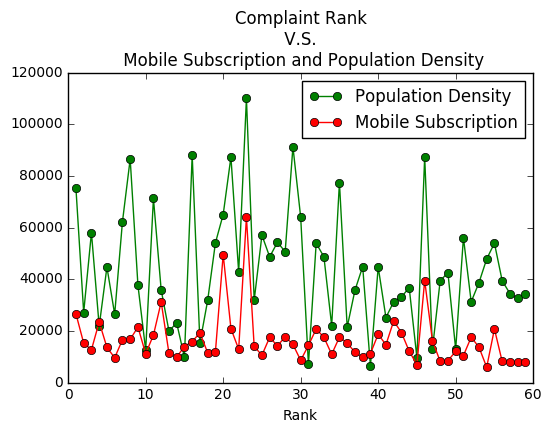

In [69]:
# Are the demographics and infrastructure different in Community Districts that show more complaints than others?
pl.plot(df.Rank, df['Population Density (per sq. mile)'],'o-g', label="Population Density")
pl.plot(df.Rank, df['Mobile Subscription'],'o-r',label='Mobile Subscription')
pl.xlabel("Rank")
pl.title( "Complaint Rank\n V.S. \n Mobile Subscription and Population Density")
pl.legend(loc = 'best')

#### Rank V.S. Mobile Subscription: Except some data points, with the decrease of Rank of Complaints, Mobile Subscroption goes down slightly.  It means communities with more family units using mobile internet are more likely to have more compaints. 
#### Rank V.S. Population Density: there's no pattern about the relationship between Rank of Complaints and Population Density for each communities.